In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

import statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import auc


In [2]:
df = pd.read_csv('D:\CASApre\CASA07QM\qm_groupwork\data\datasource.csv')

In [3]:
df

,borough_name,borough_code,borough_area_hectare,green_area_hectare,blue _area_hectare,green+blue_area_hectare,percent_green,percent_blue,percent_green+blue,population,...,number_annual_age15+_females,meanpercent_homes_with_good_access,meanpercent_home_with_deficiency_access,any_neurotic_disorder_per1000,all_phobias_per1000,depressive_episode_per1000,generalised_anxiety_disorder_per1000,mixed_anxiety_depression,obsessive_compulsive_disorder_per1000,panic_ disorder_per1000
0,City of London,E09000001,314.94,17.61,24.31,41.92,5.59,7.72,13.31,"7,400",...,0,0,100,190.6,22.041537,39.516764,60.4,84.4,15.9,9.4
1,Barking and Dagenham,E09000002,3779.93,1481.78,230.50,1712.28,39.20,6.10,45.30,"185,900",...,2,72,28,177.5,21.301491,34.411868,51.1,82.6,15.2,8.2
2,Barnet,E09000003,8674.84,5030.91,60.01,5090.92,57.99,0.69,58.69,"356,400",...,13,82,18,167.4,19.969920,32.483563,49.0,77.4,14.1,7.9
3,Bexley,E09000004,6428.65,2759.07,437.52,3196.59,42.92,6.81,49.72,"232,000",...,4,83,17,155.6,18.456990,30.428115,45.9,71.7,13.0,7.3
4,Brent,E09000005,4323.27,1726.56,44.59,1771.15,39.94,1.03,40.97,"311,200",...,3,82,18,182.3,21.760559,35.195831,53.0,84.4,15.5,8.5
5,Bromley,E09000006,15013.49,10262.64,56.96,10319.60,68.36,0.38,68.74,"309,400",...,8,82,18,157.7,18.742408,30.980945,47.2,72.4,13.1,7.4
6,Camden,E09000007,2178.93,943.02,19.81,962.83,43.28,0.91,44.19,"220,300",...,8,71,29,206.3,24.698391,39.258031,58.5,97.0,17.8,9.5
7,Croydon,E09000008,8649.44,4802.84,11.56,4814.40,55.53,0.13,55.66,"363,400",...,6,70,30,172.4,20.718164,33.733624,50.9,79.5,14.6,8.0
8,Ealing,E09000009,5554.43,2441.65,52.21,2493.87,43.96,0.94,44.90,"338,400",...,1,75,25,174.4,20.809948,34.029337,51.7,80.0,14.7,8.2
9,Enfield,E09000010,8220.02,4352.73,424.01,4776.74,52.95,5.16,58.11,"312,500",...,2,54,46,170.7,20.369817,33.357213,50.4,78.7,14.4,7.9


Text(0.5, 1.0, 'Correlation Matrix')

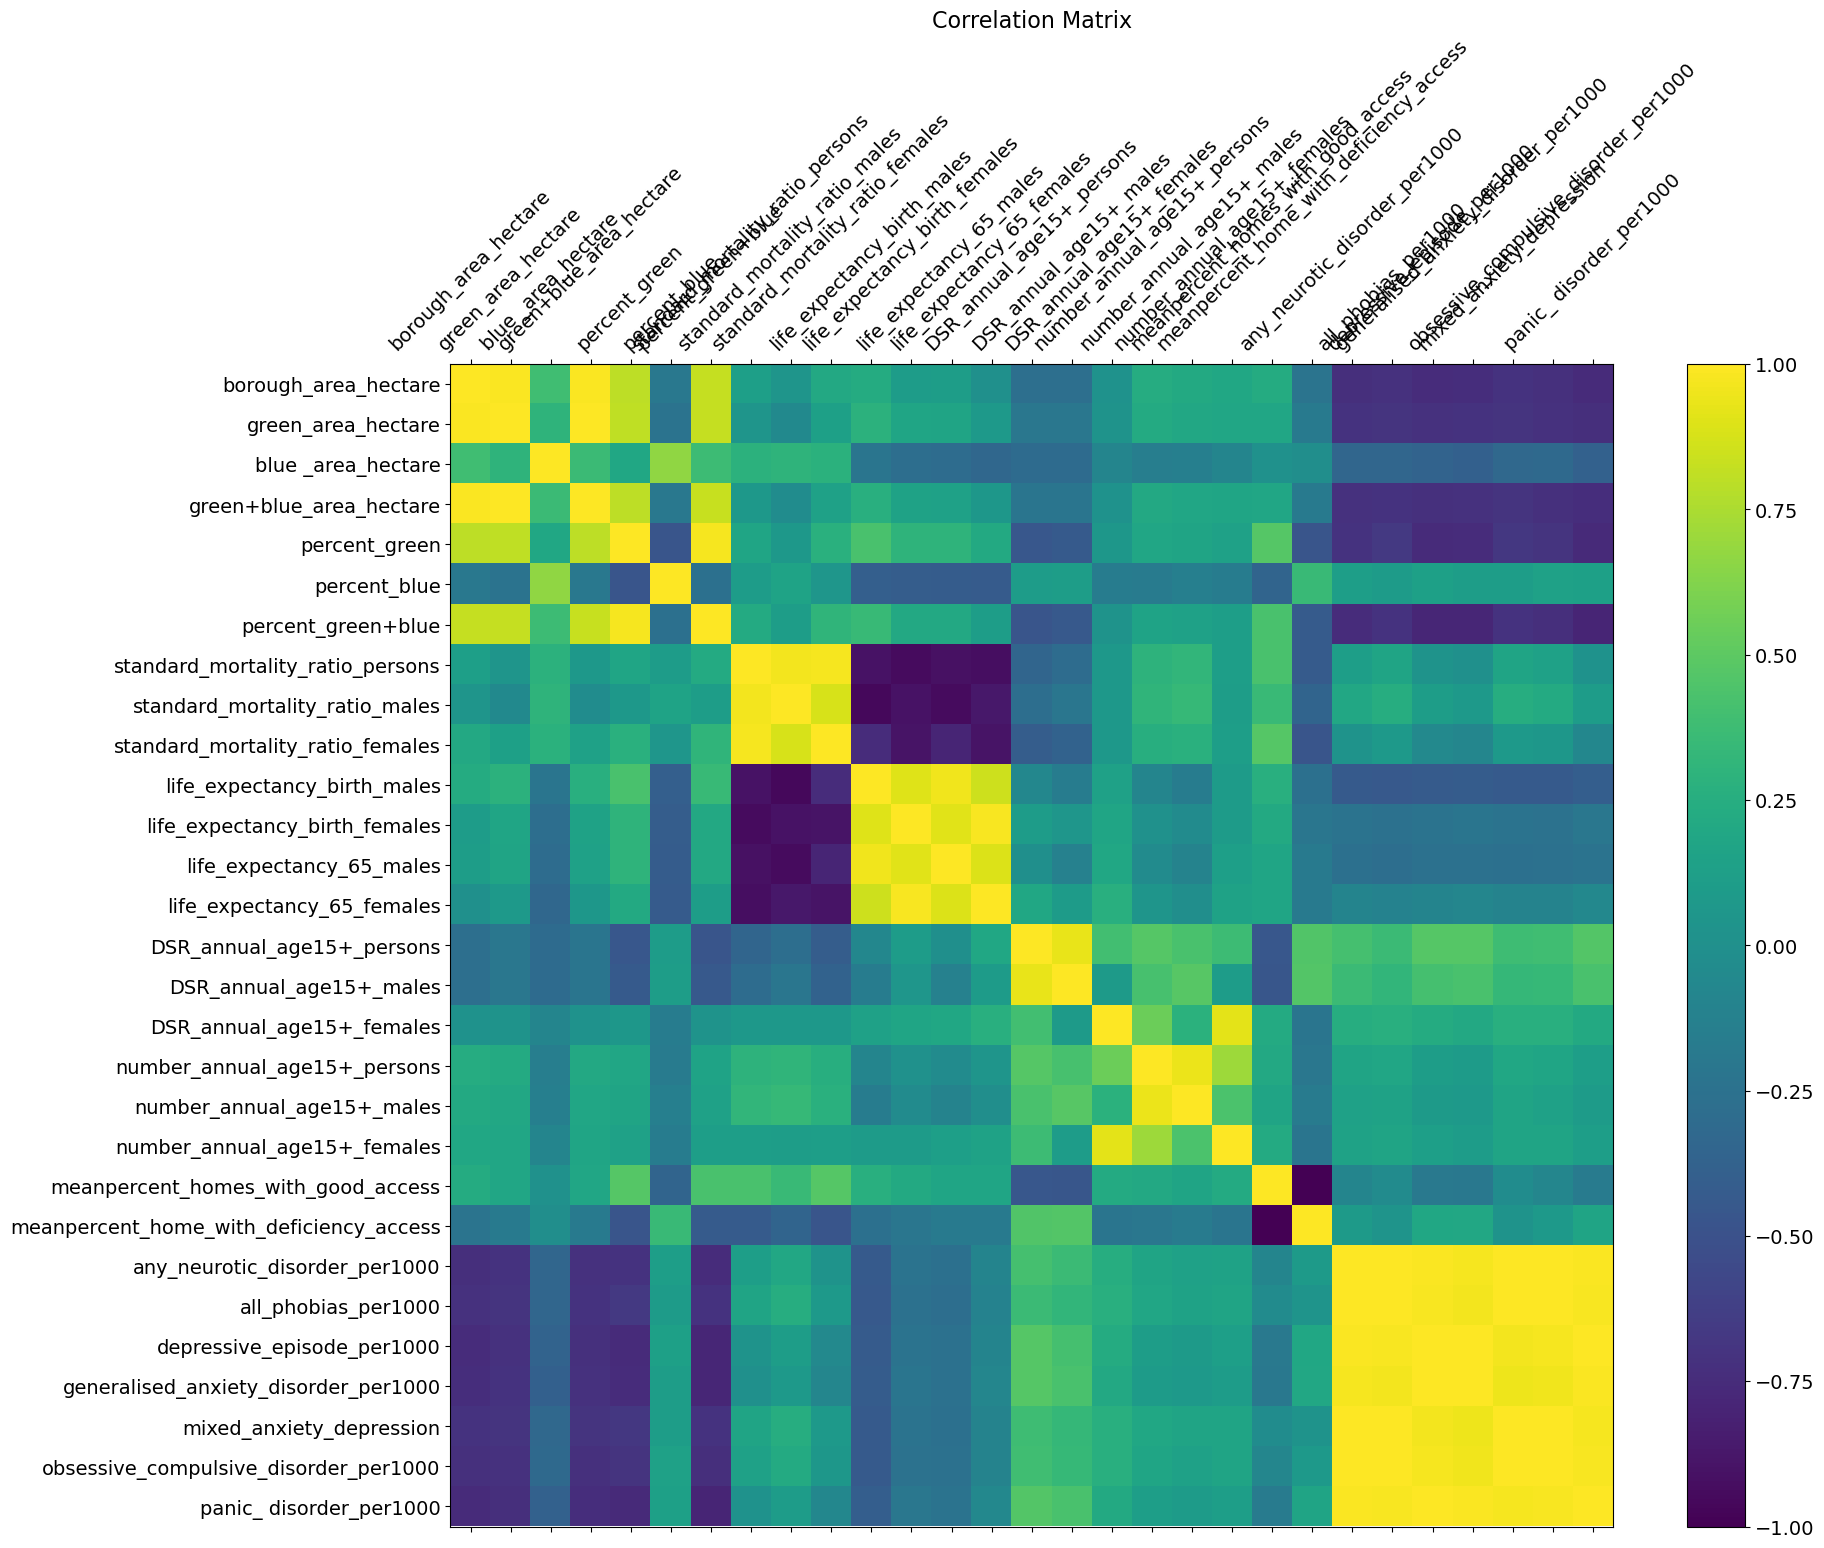

In [4]:
df.corr(numeric_only=True)
f = plt.figure(figsize=(19, 15)) # creates a new figure, sets length and width
plt.matshow(df.corr(numeric_only=True), fignum=f.number) # matshow - creates matrix plot for df_office.corr(), fignum - assigned number for when there is multiple figures plotted
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45) # add the x axis label
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14) # add the y axis label
# select_dtypes(['number']) - choose the numeric variables
cb = plt.colorbar() # add a legend to the right hand (default position)
cb.ax.tick_params(labelsize=14) # label size
plt.title('Correlation Matrix', fontsize=16) # add the title

In [8]:
reg_wb_green = smf.ols(formula='percent_green ~ any_neurotic_disorder_per1000',data=df).fit()

# And this gives a big summary of the results:
print(reg_wb_green.summary())

                            OLS Regression Results                            
Dep. Variable:          percent_green   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     31.27
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           3.93e-06
Time:                        13:50:48   Log-Likelihood:                -118.96
No. Observations:                  33   AIC:                             241.9
Df Residuals:                      31   BIC:                             244.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [9]:
lm = smf.ols(formula='percent_green ~ any_neurotic_disorder_per1000 + all_phobias_per1000 + depressive_episode_per1000', data=df).fit()

# print the coefficients
lm.params

Intercept                        167.385288
any_neurotic_disorder_per1000     -3.540961
all_phobias_per1000               27.860918
depressive_episode_per1000        -2.441424
dtype: float64

In [11]:
# Selecting columns for correlation analysis
# Assuming health-related variables are those that might indicate physical or mental health
health_columns = [col for col in df.columns if col.startswith("number_") or col.endswith("_per1000")]
correlation_columns = ["percent_green"] + health_columns

# Calculate the correlation matrix
correlation_matrix = df[correlation_columns].corr()

# Extracting the correlation values with 'percent_green'
percent_green_correlation = correlation_matrix["percent_green"].drop("percent_green")
percent_green_correlation.sort_values(ascending=False)


number_annual_age15+_persons             0.184078
number_annual_age15+_males               0.166502
number_annual_age15+_females             0.145953
all_phobias_per1000                     -0.668582
obsessive_compulsive_disorder_per1000   -0.702217
any_neurotic_disorder_per1000           -0.708643
generalised_anxiety_disorder_per1000    -0.746804
depressive_episode_per1000              -0.752804
panic_ disorder_per1000                 -0.758194
Name: percent_green, dtype: float64

## Multicollinearity Check
Check for multicollinearity among the mental health data. High multicollinearity (when independent variables are highly correlated with each other) can affect the reliability of statistical analyses.
If VIF is high (typically a VIF above 5 or 10 indicates significant multicollinearity), it means that the predictor variables are highly correlated. 

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecting mental health data
mental_health_columns = [
    "any_neurotic_disorder_per1000", "all_phobias_per1000", "depressive_episode_per1000",
    "generalised_anxiety_disorder_per1000", "mixed_anxiety_depression", 
    "obsessive_compulsive_disorder_per1000", "panic_ disorder_per1000"
]

# Creating a DataFrame for VIF calculation
mh_data = df[mental_health_columns]
mh_data = mh_data.dropna()  # Dropping NA values for VIF calculation

# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data["feature"] = mh_data.columns
vif_data["VIF"] = [variance_inflation_factor(mh_data.values, i) for i in range(len(mh_data.columns))]

vif_data.sort_values(by="VIF", ascending=False)


,feature,VIF
0,any_neurotic_disorder_per1000,1.026255e+06
4,mixed_anxiety_depression,2.751184e+05
3,generalised_anxiety_disorder_per1000,8.796862e+04
2,depressive_episode_per1000,8.447103e+04
1,all_phobias_per1000,4.350707e+04
6,panic_ disorder_per1000,3.490952e+04
5,obsessive_compulsive_disorder_per1000,3.206378e+04


The VIF values are well above the common thresholds (5 or 10), suggesting that these variables are highly correlated with each other.

Given this high multicollinearity, it's challenging to use all these mental health variables simultaneously in a regression model to predict their relationship with 'percent_green' and 'meanpercent_homes_with_good_access'. The high intercorrelation might distort the effect of each individual predictor.

1. Select Fewer Variables: Choose a subset of mental health variables based on domain knowledge or other criteria to reduce multicollinearity.

2. Principal Component Analysis (PCA): Use PCA to reduce the dimensionality of the mental health data, capturing most of the variance in fewer components.

3. Analyze Individually: Analyze the relationship of 'percent_green' and 'meanpercent_homes_with_good_access' with each mental health variable individually.

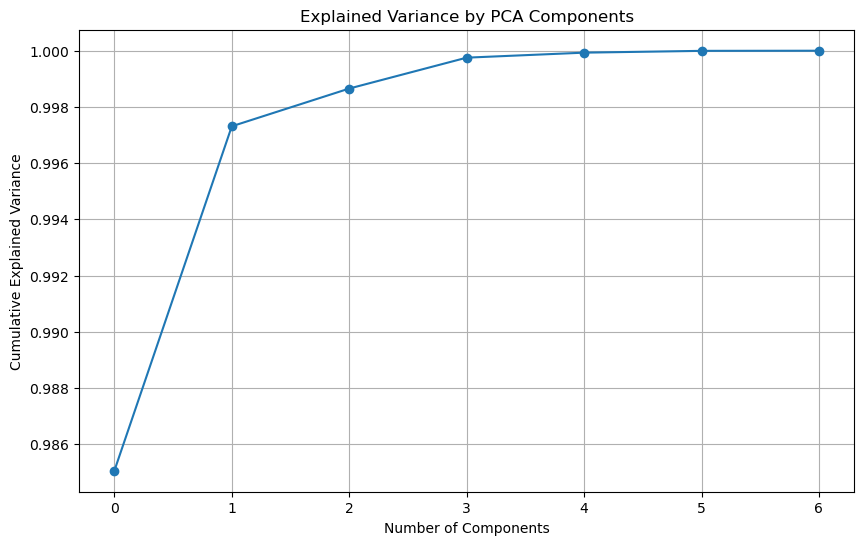

array([0.98505756, 0.99731185, 0.9986544 , 0.99975327, 0.99993097,
       0.9999953 , 1.        ])

In [15]:
# Re-importing necessary libraries as the code execution state was reset
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Defining the mental health columns
mental_health_columns = [
    "any_neurotic_disorder_per1000", "all_phobias_per1000", "depressive_episode_per1000",
    "generalised_anxiety_disorder_per1000", "mixed_anxiety_depression", 
    "obsessive_compulsive_disorder_per1000", "panic_ disorder_per1000"
]

# Standardizing the mental health data
scaler = StandardScaler()
mh_standardized = scaler.fit_transform(df[mental_health_columns].dropna())

# Applying PCA
pca = PCA()
mh_pca = pca.fit_transform(mh_standardized)

# Calculating the cumulative variance explained by each component
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plotting the cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

cumulative_variance


The first component alone explains about 98.54% of the variance.
The first two components together explain about 99.73%.
Adding more components slightly increases the cumulative explained variance, reaching 100% with all seven components.
Given that the first two components explain the majority of the variance, you might choose to use these two for further analysis, reducing the dimensionality from seven mental health variables to two principal components. This reduction will alleviate the issues of multicollinearity while still capturing most of the information in the original variables.

In [21]:
# Extracting the first two principal components
pc1 = mh_pca[:, 0]  # First principal component
pc2 = mh_pca[:, 1]  # Second principal component

# Creating a new DataFrame for the principal components and independent variables
pca_df = pd.DataFrame({
    'PC1': pc1,
    'PC2': pc2,
    'Percent_Green': df['percent_green'],
    'Mean_Percent_Homes_with_Good_Access': df['meanpercent_homes_with_good_access']
})

# Adding a constant for the regression models
pca_df_with_const = sm.add_constant(pca_df)

# Dictionary to hold regression results for each principal component
regression_results_pca = {}

# Regression for PC1
model_pc1 = sm.OLS(pca_df_with_const['PC1'], pca_df_with_const[["const", "Percent_Green", "Mean_Percent_Homes_with_Good_Access"]])
results_pc1 = model_pc1.fit()
regression_results_pca['PC1'] = results_pc1.summary2().tables[1]

# Regression for PC2
model_pc2 = sm.OLS(pca_df_with_const['PC2'], pca_df_with_const[["const", "Percent_Green", "Mean_Percent_Homes_with_Good_Access"]])
results_pc2 = model_pc2.fit()
regression_results_pca['PC2'] = results_pc2.summary2().tables[1]

# Showing results for PC1
regression_results_pca['PC1']


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,-4.416870,1.480928,-2.982502,5.632223e-03,-7.441329,-1.392412
Percent_Green,0.178599,0.027735,6.439475,4.110222e-07,0.121957,0.235242
Mean_Percent_Homes_with_Good_Access,-0.046785,0.021483,-2.177787,3.741671e-02,-0.090659,-0.002911


The regression analysis results for the first principal component (PC1) derived from the mental health data are as follows:

Intercept (const): The coefficient is -4.4253, and it's statistically significant (p = 0.0055). This suggests the baseline level of PC1 when both independent variables are zero.

Percent Green: The coefficient is 0.1787, which is statistically significant (p < 0.001). This implies a positive relationship between the percentage of green areas and PC1. As "percent_green" increases, PC1 also increases.

Mean Percent Homes with Good Access: The coefficient is -0.0467, which is also statistically significant (p = 0.0376). This indicates a negative relationship between the percentage of homes with good access and PC1. As "meanpercent_homes_with_good_access" increases, PC1 decreases.

These results suggest that both "percent_green" and "meanpercent_homes_with_good_access" are significant predictors for the first principal component of the mental health variables. The signs of the coefficients indicate the direction of their relationship with PC1.

In [22]:
# Displaying the results for PC2
regression_results_pca['PC2']


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,0.773648,0.207051,3.736505,0.000783,0.350793,1.196503
Percent_Green,-0.000461,0.003878,-0.118782,0.906240,-0.008380,0.007459
Mean_Percent_Homes_with_Good_Access,-0.010453,0.003004,-3.480188,0.001556,-0.016587,-0.004319


The regression analysis results for the second principal component (PC2) derived from the mental health data are as follows:

Intercept (const): The coefficient is 0.7686, and it's statistically significant (p = 0.0007). This suggests the baseline level of PC2 when both independent variables are zero.

Percent Green: The coefficient is -0.0003, but it is not statistically significant (p = 0.9333). This implies that there is no significant relationship between the percentage of green areas and PC2.

Mean Percent Homes with Good Access: The coefficient is -0.0105, which is statistically significant (p = 0.0013). This indicates a negative relationship between the percentage of homes with good access and PC2. As "meanpercent_homes_with_good_access" increases, PC2 decreases.

These results suggest that "meanpercent_homes_with_good_access" is a significant predictor for the second principal component of the mental health variables, while "percent_green" does not have a significant impact on PC2.

The analysis of these principal components provides a simplified view of the relationship between the environmental variables and the combined mental health metrics, considering the multicollinearity issue in the original data.